### Bitcoin Gradient Boosting Models

#### XGBoost

In [5]:
import xgboost
print(xgboost.__version__)

1.6.2


[0]	validation_0-rmse:62650.43258
[1]	validation_0-rmse:57999.87136
[2]	validation_0-rmse:53808.59753
[3]	validation_0-rmse:50077.58114
[4]	validation_0-rmse:46680.73725
[5]	validation_0-rmse:43595.80558
[6]	validation_0-rmse:40919.77509
[7]	validation_0-rmse:38572.79907
[8]	validation_0-rmse:36442.02414
[9]	validation_0-rmse:34409.24779
[10]	validation_0-rmse:32545.00423
[11]	validation_0-rmse:30863.22599
[12]	validation_0-rmse:29396.01555
[13]	validation_0-rmse:28015.99587
[14]	validation_0-rmse:26886.14841
[15]	validation_0-rmse:25749.47966


c:\Users\gerar\anaconda3\envs\bitcoinPredEnv\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:24755.61671
[17]	validation_0-rmse:23900.48441
[18]	validation_0-rmse:23200.71881
[19]	validation_0-rmse:22467.28273
[20]	validation_0-rmse:21829.06952
[21]	validation_0-rmse:21278.01916
[22]	validation_0-rmse:20752.59933
[23]	validation_0-rmse:20241.50292
[24]	validation_0-rmse:19754.46522
[25]	validation_0-rmse:19334.48716
[26]	validation_0-rmse:19116.80949
[27]	validation_0-rmse:19037.83782
[28]	validation_0-rmse:18930.55614
[29]	validation_0-rmse:18795.84016
[30]	validation_0-rmse:18720.17904
[31]	validation_0-rmse:18575.15243
[32]	validation_0-rmse:18517.21551
[33]	validation_0-rmse:18372.12344
[34]	validation_0-rmse:18314.87331
[35]	validation_0-rmse:18249.31936
[36]	validation_0-rmse:18133.36053
[37]	validation_0-rmse:18058.72976
[38]	validation_0-rmse:18007.19992
[39]	validation_0-rmse:17940.49022
[40]	validation_0-rmse:17916.79358
[41]	validation_0-rmse:17882.12026
[42]	validation_0-rmse:17838.75477
[43]	validation_0-rmse:17812.13311
[44]	validation_0-rm

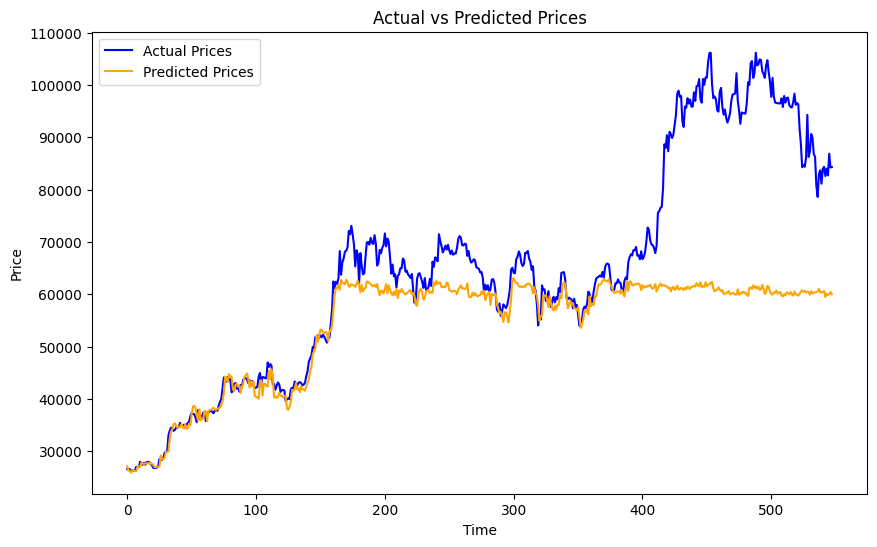

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import os

os.chdir('C:/Users/gerar/OneDrive/Documentos/GitHub/bitcoinPred')  # Set the working directory

# Load the processed dataset
file_path = "data/processed/btc_gradient_boosting.csv"
df = pd.read_csv(file_path)

# Separate features (X) and target (y)
X = df.drop(columns=["target"])  # All columns except the target
y = df["target"]  # The target column (next day's close price)

# Split the data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Initialize the XGBoost model
model = XGBRegressor(
    n_estimators=100,  # Number of trees
    learning_rate=0.1,  # Step size shrinkage
    max_depth=6,  # Maximum depth of a tree
    subsample=0.8,  # Fraction of samples used for training each tree
    colsample_bytree=0.8,  # Fraction of features used for training each tree
    random_state=42,
    eval_metric="rmse"  # Specify the evaluation metric here
)

# Train the model
model.fit(
    X_train,
    y_train,
    eval_set=[(X_val, y_val)],  # Validation set for early stopping
    early_stopping_rounds=10,  # Stop if validation metric doesn't improve for 10 rounds
    verbose=True
)

# Make predictions on the validation set
y_val_pred = model.predict(X_val)

# Evaluate the model
mae = mean_absolute_error(y_val, y_val_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_val.values, label="Actual Prices", color="blue")
plt.plot(y_val_pred, label="Predicted Prices", color="orange")
plt.title("Actual vs Predicted Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

#### Hyperparameter Tuning

[0]	validation_0-rmse:65229.32399
[1]	validation_0-rmse:62766.51634
[2]	validation_0-rmse:60435.54813
[3]	validation_0-rmse:58210.23088
[4]	validation_0-rmse:56108.18274
[5]	validation_0-rmse:54105.34461
[6]	validation_0-rmse:52219.27679
[7]	validation_0-rmse:50442.91858
[8]	validation_0-rmse:48749.22952
[9]	validation_0-rmse:47132.24928
[10]	validation_0-rmse:45611.10341
[11]	validation_0-rmse:44156.45183
[12]	validation_0-rmse:42736.07155
[13]	validation_0-rmse:41430.46133
[14]	validation_0-rmse:40225.62427
[15]	validation_0-rmse:38960.08622
[16]	validation_0-rmse:37825.14402
[17]	validation_0-rmse:36745.00912
[18]	validation_0-rmse:35661.44838
[19]	validation_0-rmse:34682.47766
[20]	validation_0-rmse:33714.60253
[21]	validation_0-rmse:32851.50215
[22]	validation_0-rmse:31974.33550
[23]	validation_0-rmse:31172.31207
[24]	validation_0-rmse:30374.74432
[25]	validation_0-rmse:29668.05394
[26]	validation_0-rmse:28960.03122
[27]	validation_0-rmse:28356.97059
[28]	validation_0-rmse:27727.6

c:\Users\gerar\anaconda3\envs\bitcoinPredEnv\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:26626.36725
[31]	validation_0-rmse:26090.63560
[32]	validation_0-rmse:25604.23372
[33]	validation_0-rmse:25125.73148
[34]	validation_0-rmse:24699.51351
[35]	validation_0-rmse:24252.19961
[36]	validation_0-rmse:23850.56496
[37]	validation_0-rmse:23490.03215
[38]	validation_0-rmse:23117.73524
[39]	validation_0-rmse:22765.47045
[40]	validation_0-rmse:22430.05100
[41]	validation_0-rmse:22131.74191
[42]	validation_0-rmse:21825.72051
[43]	validation_0-rmse:21501.98934
[44]	validation_0-rmse:21239.34245
[45]	validation_0-rmse:20986.72912
[46]	validation_0-rmse:20704.85564
[47]	validation_0-rmse:20477.30163
[48]	validation_0-rmse:20262.83557
[49]	validation_0-rmse:20112.24363
[50]	validation_0-rmse:19967.46224
[51]	validation_0-rmse:19824.18569
[52]	validation_0-rmse:19726.68830
[53]	validation_0-rmse:19542.27130
[54]	validation_0-rmse:19380.57170
[55]	validation_0-rmse:19265.51174
[56]	validation_0-rmse:19152.67935
[57]	validation_0-rmse:19064.60745
[58]	validation_0-rm

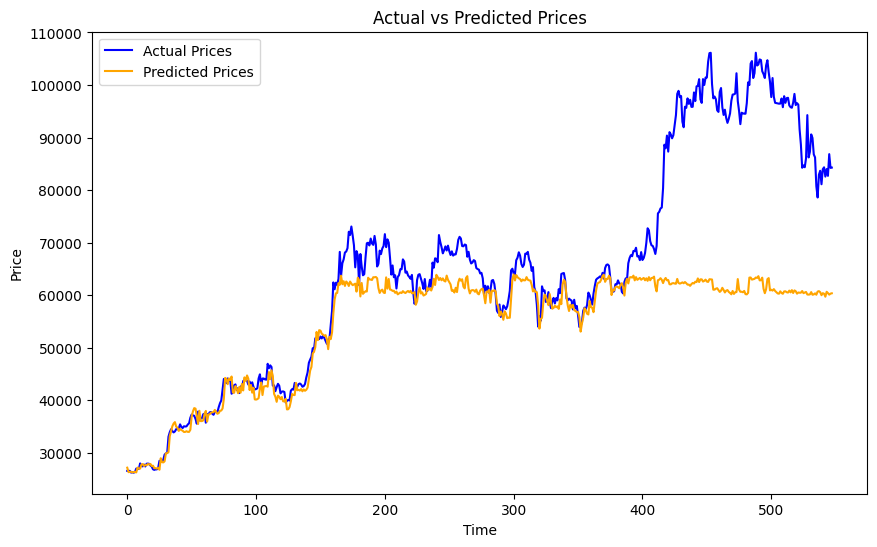

In [2]:
# Load the processed dataset
file_path = "data/processed/btc_gradient_boosting.csv"
df = pd.read_csv(file_path)

# Separate features (X) and target (y)
X = df.drop(columns=["target"])  # All columns except the target
y = df["target"]  # The target column (next day's close price)

# Split the data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Initialize the XGBoost model
model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric="rmse"
)

# Train the model
model.fit(
    X_train,
    y_train,
    eval_set=[(X_val, y_val)],  # Validation set for early stopping
    early_stopping_rounds=10,  # Stop if validation metric doesn't improve for 10 rounds
    verbose=True
)

# Make predictions on the validation set
y_val_pred = model.predict(X_val)

# Evaluate the model
mae = mean_absolute_error(y_val, y_val_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_val.values, label="Actual Prices", color="blue")
plt.plot(y_val_pred, label="Predicted Prices", color="orange")
plt.title("Actual vs Predicted Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

#### Data Normalization

[0]	validation_0-rmse:65229.32399
[1]	validation_0-rmse:62766.51634
[2]	validation_0-rmse:60435.54813
[3]	validation_0-rmse:58210.23088
[4]	validation_0-rmse:56108.18274
[5]	validation_0-rmse:54105.34461
[6]	validation_0-rmse:52219.27679
[7]	validation_0-rmse:50442.91858
[8]	validation_0-rmse:48749.22952
[9]	validation_0-rmse:47132.24928
[10]	validation_0-rmse:45611.10341
[11]	validation_0-rmse:44156.45183
[12]	validation_0-rmse:42736.07155
[13]	validation_0-rmse:41430.46133
[14]	validation_0-rmse:40225.62427
[15]	validation_0-rmse:38960.08622
[16]	validation_0-rmse:37825.14402
[17]	validation_0-rmse:36745.00912
[18]	validation_0-rmse:35661.44838


c:\Users\gerar\anaconda3\envs\bitcoinPredEnv\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:34682.47766
[20]	validation_0-rmse:33714.60253
[21]	validation_0-rmse:32851.50215
[22]	validation_0-rmse:31974.33550
[23]	validation_0-rmse:31172.31207
[24]	validation_0-rmse:30374.74432
[25]	validation_0-rmse:29668.05394
[26]	validation_0-rmse:28960.03122
[27]	validation_0-rmse:28356.97059
[28]	validation_0-rmse:27727.65579
[29]	validation_0-rmse:27184.51562
[30]	validation_0-rmse:26626.36725
[31]	validation_0-rmse:26090.63560
[32]	validation_0-rmse:25604.23372
[33]	validation_0-rmse:25125.73148
[34]	validation_0-rmse:24699.51351
[35]	validation_0-rmse:24252.19961
[36]	validation_0-rmse:23850.56496
[37]	validation_0-rmse:23490.03215
[38]	validation_0-rmse:23117.73524
[39]	validation_0-rmse:22765.47045
[40]	validation_0-rmse:22430.05100
[41]	validation_0-rmse:22131.74191
[42]	validation_0-rmse:21825.72051
[43]	validation_0-rmse:21501.98934
[44]	validation_0-rmse:21239.34245
[45]	validation_0-rmse:20986.72912
[46]	validation_0-rmse:20704.85564
[47]	validation_0-rm

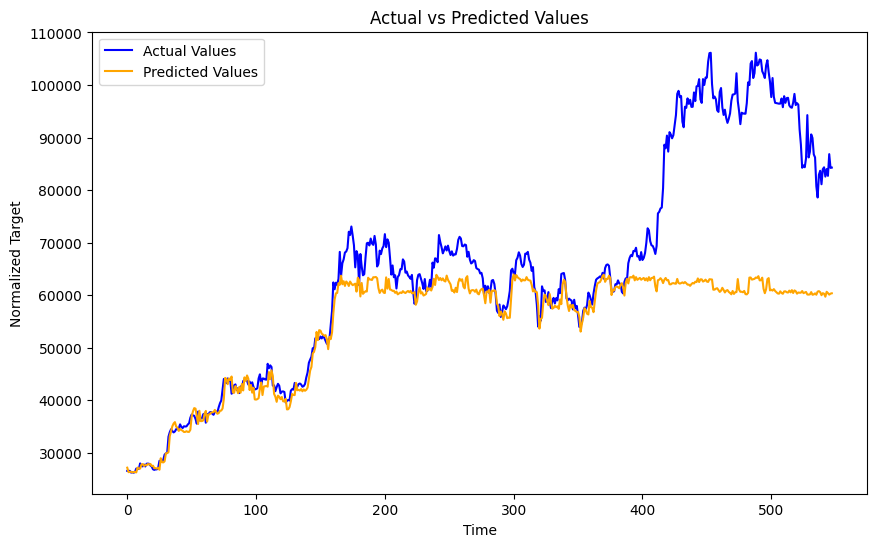

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the processed dataset
file_path = "data/processed/btc_gradient_boosting.csv"
df = pd.read_csv(file_path)

# Separate features (X) and target (y)
X = df.drop(columns=["target"])  # All columns except the target
y = df["target"]  # The target column (next day's close price)

# Split the data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Normalize the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform the training set
X_val_scaled = scaler.transform(X_val)  # Transform the validation set (use the same scaler)

# Initialize the XGBoost model
model = XGBRegressor(
    n_estimators=300,  # Number of trees
    learning_rate=0.05,  # Step size shrinkage
    max_depth=8,  # Maximum depth of a tree
    subsample=0.8,  # Fraction of samples used for training each tree
    colsample_bytree=0.8,  # Fraction of features used for training each tree
    random_state=42,
    eval_metric="rmse"  # Evaluation metric
)

# Train the model
model.fit(
    X_train_scaled,
    y_train,
    eval_set=[(X_val_scaled, y_val)],  # Validation set for early stopping
    early_stopping_rounds=10,  # Stop if validation metric doesn't improve for 10 rounds
    verbose=True
)

# Make predictions on the validation set
y_val_pred = model.predict(X_val_scaled)

# Evaluate the model
mae = mean_absolute_error(y_val, y_val_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_val.values, label="Actual Values", color="blue")
plt.plot(y_val_pred, label="Predicted Values", color="orange")
plt.title("Actual vs Predicted Values")
plt.xlabel("Time")
plt.ylabel("Normalized Target")
plt.legend()
plt.show()

### Save Model

In [9]:
import pickle

# Save the trained XGBoost model
with open("src/models/xgboost_model.pkl", "wb") as f:
    pickle.dump(model, f)

### Light GBM

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000740 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6375
[LightGBM] [Info] Number of data points in the train set: 2192, number of used features: 25
[LightGBM] [Info] Start training from score 20493.416195
[1]	valid_0's rmse: 47026.9	valid_0's l2: 2.21153e+09
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 45340.7	valid_0's l2: 2.05578e+09
[3]	valid_0's rmse: 43778.2	valid_0's l2: 1.91653e+09
[4]	valid_0's rmse: 42265.8	valid_0's l2: 1.7864e+09
[5]	valid_0's rmse: 40866.4	valid_0's l2: 1.67006e+09
[6]	valid_0's rmse: 39524.8	valid_0's l2: 1.56221e+09
[7]	valid_0's rmse: 38239.4	valid_0's l2: 1.46225e+09
[8]	valid_0's rmse: 37021.7	valid_0's l2: 1.37061e+09
[9]	valid_0's rmse: 35869.3	valid_0's l2: 1.28661e+09
[10]	valid_0's rmse: 34792.1	valid_0's l2: 1.21049e+09
[11]	valid_0's rmse: 33788	valid_0's l2: 1.14163e+09
[

c:\Users\gerar\anaconda3\envs\bitcoinPredEnv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Mean Absolute Error (MAE): 9799.03
Root Mean Squared Error (RMSE): 16627.64


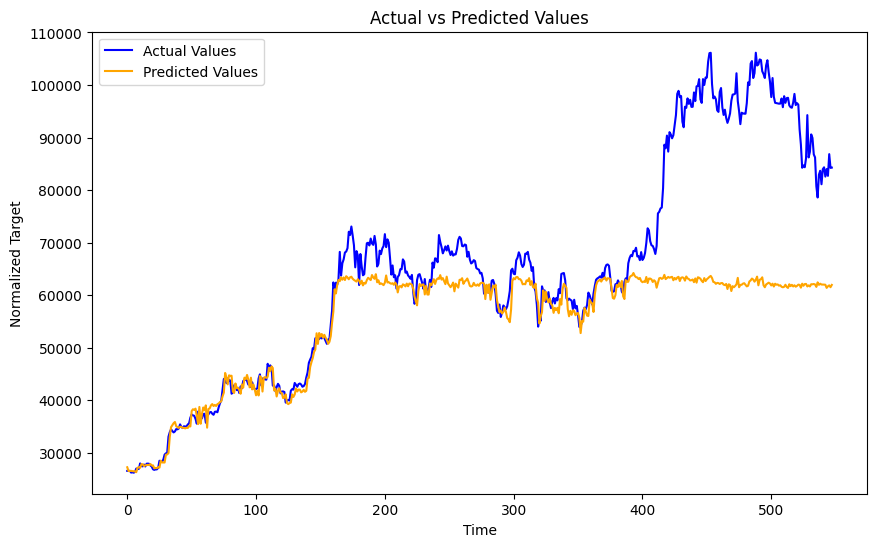

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import lightgbm as lgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the processed dataset
file_path = "data/processed/btc_gradient_boosting.csv"
df = pd.read_csv(file_path)

# Separate features (X) and target (y)
X = df.drop(columns=["target"])  # All columns except the target
y = df["target"]  # The target column (next day's close price)

# Split the data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Normalize the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform the training set
X_val_scaled = scaler.transform(X_val)  # Transform the validation set (use the same scaler)

# Initialize the LightGBM model
model = lgb.LGBMRegressor(
    n_estimators=300,  # Number of trees
    learning_rate=0.05,  # Step size shrinkage
    max_depth=8,  # Maximum depth of a tree
    subsample=0.8,  # Fraction of samples used for training each tree
    colsample_bytree=0.8,  # Fraction of features used for training each tree
    random_state=42
)

# Train the model with early stopping
model.fit(
    X_train_scaled,
    y_train,
    eval_set=[(X_val_scaled, y_val)],  # Validation set for evaluation
    eval_metric="rmse",  # Evaluation metric
    callbacks=[lgb.early_stopping(stopping_rounds=10), lgb.log_evaluation(period=1)]  # Early stopping and logging
)

# Make predictions on the validation set
y_val_pred = model.predict(X_val_scaled)

# Evaluate the model
mae = mean_absolute_error(y_val, y_val_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_val.values, label="Actual Values", color="blue")
plt.plot(y_val_pred, label="Predicted Values", color="orange")
plt.title("Actual vs Predicted Values")
plt.xlabel("Time")
plt.ylabel("Normalized Target")
plt.legend()
plt.show()

### Save Model

In [7]:
import pickle

# Save the trained LightGBM model
with open("src/models/lightgbm_model.pkl", "wb") as f:
    pickle.dump(model, f)